In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,  precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_excel(r'C:\Users\Jose Chua\OneDrive\Python\School Snek Work\831\Team_Project\cleaned3.xlsx')

In [3]:
df.head(10)

,duration_of_dcp,DCP_drop_status,age_at_activation,dependents_at_activation,number_in_household_at_activation,asset_amount_owed_at_activation,asset_value_at_activation,monthly_income_at_activation,monthly_expenses_at_activation,DCP_debt_at_activation,...,activation_day_sin,activation_day_cos,start_month_sin,start_month_cos,start_day_sin,start_day_cos,drop_month_sin,drop_month_cos,drop_day_sin,drop_day_cos
0,48,Successful Completion,59,0,2,170000,253000,2600.00,3144.0,2,...,0.781831,0.623490,-0.866025,-0.500000,-0.433884,-0.900969,-0.866025,-5.000000e-01,0.974928,-0.222521
1,38,Non Payment,63,0,1,79000,381000,1200.00,1555.0,1,...,0.433884,-0.900969,-0.500000,0.866025,-0.781831,0.623490,0.500000,8.660254e-01,0.433884,-0.900969
2,29,Successful Completion,33,0,2,0,3500,2300.00,1902.0,8,...,0.000000,1.000000,0.866025,-0.500000,-0.781831,0.623490,-1.000000,-1.836970e-16,-0.433884,-0.900969
3,22,Non Payment,36,3,5,7000,7400,5435.00,4968.0,8,...,-0.974928,-0.222521,0.866025,-0.500000,-0.781831,0.623490,0.866025,5.000000e-01,0.974928,-0.222521
4,8,Non Payment,39,3,4,0,5000,3936.00,3758.0,10,...,0.433884,-0.900969,0.866025,0.500000,-0.433884,-0.900969,-0.866025,5.000000e-01,0.433884,-0.900969
5,36,Successful Completion,33,0,2,0,5000,5600.00,4225.0,8,...,-0.433884,-0.900969,0.500000,-0.866025,0.433884,-0.900969,0.500000,-8.660254e-01,-0.974928,-0.222521
6,6,Non Payment,45,1,3,0,466000,3386.76,2581.0,3,...,0.000000,1.000000,0.866025,-0.500000,0.974928,-0.222521,-0.866025,5.000000e-01,-0.433884,-0.900969
7,6,Non Payment,32,0,1,0,1000,2235.00,1994.0,4,...,0.781831,0.623490,-0.500000,-0.866025,0.000000,1.000000,0.500000,8.660254e-01,0.781831,0.623490
8,48,Non Payment,73,0,1,0,200,1860.00,1605.0,2,...,0.433884,-0.900969,-0.866025,0.500000,0.781831,0.623490,-0.866025,5.000000e-01,0.974928,-0.222521
9,45,Non Payment,38,2,4,19798,19798,5328.00,4415.0,2,...,0.433884,-0.900969,-0.500000,0.866025,0.433884,-0.900969,-0.866025,-5.000000e-01,0.433884,-0.900969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   duration_of_dcp                              3122 non-null   int64  
 1   DCP_drop_status                              3122 non-null   object 
 2   age_at_activation                            3122 non-null   int64  
 3   dependents_at_activation                     3122 non-null   int64  
 4   number_in_household_at_activation            3122 non-null   int64  
 5   asset_amount_owed_at_activation              3122 non-null   int64  
 6   asset_value_at_activation                    3122 non-null   int64  
 7   monthly_income_at_activation                 3122 non-null   float64
 8   monthly_expenses_at_activation               3122 non-null   float64
 9   DCP_debt_at_activation                       3122 non-null   int64  
 10  

In [5]:
X = df.drop(['DCP_drop_status'], axis=1)
y = df['DCP_drop_status']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [7]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7585


In [8]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7585


In [9]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

duration_of_dcp                                0.068219
DCP_start_date_year                            0.056053
DCP_activation_date_year                       0.044617
debt_income_ratio                              0.035981
pmtstatus12                                    0.035854
                                                 ...   
marital status_Common Law/Domestic Partners    0.002203
marital status_Widowed                         0.002201
marital status_Separated                       0.002149
marital status_Divorced                        0.001996
gender_Other/Not Reported                      0.001272
Length: 62, dtype: float64

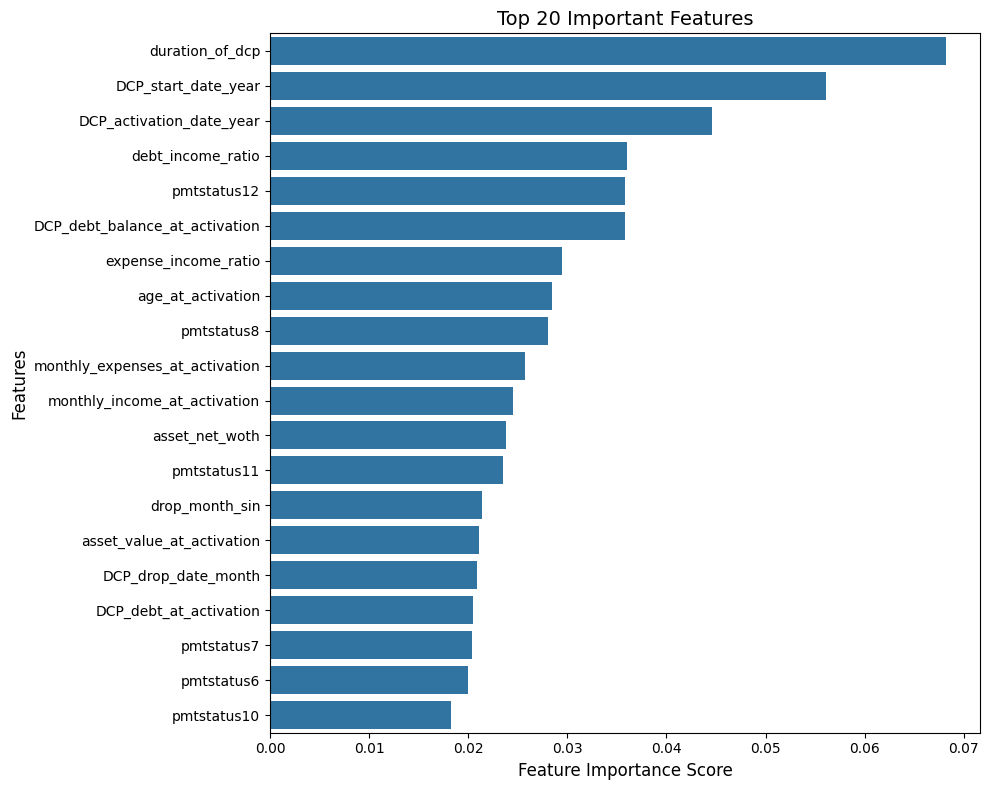

In [19]:
# Creating a seaborn bar plot

top_20_features = feature_scores.nlargest(20)

# Create the bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.barplot(x=top_20_features, y=top_20_features.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add title to the graph
plt.title("Top 20 Important Features", fontsize=14)

# Improve layout and visualize the graph
plt.tight_layout()
plt.show()

In [22]:
# Get the top 20 feature names
top_20_features = feature_scores.nlargest(20).index

# Select only the top 20 features for X
X = df[top_20_features]
y = df['DCP_drop_status']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with top 20 features : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with top 20 features : 0.7342
